In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

In [ ]:

import torch
import torchvision

from torch import nn
from torchvision import transforms
# from helper_functions import set_seeds

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
train_dir=r'C:\Users\agnis\Downloads\DATASET\train'
test_dir =  r'C:\Users\agnis\Downloads\DATASET\test'
import numpy as np



# Yoga, originating in ancient India and now globally embraced, offers manifold benefits including physical fitness, mental stability, improved posture, and purported height-increasing advantages for individuals aged 11 to 25, alongside pain management [5]. While numerous yoga training centers exist worldwide, financial constraints often hinder access to personalized instruction, leading many practitioners to turn to online platforms for guidance. However, the absence of direct supervision poses challenges in ensuring the precision and efficacy of one's practice, prompting the exploration of innovative solutions leveraging technologies such as artificial intelligence and augmented reality to provide real-time feedback on form and technique. Embracing these advancements can empower practitioners to refine their practice and optimize its benefits, fostering a culture of informed engagement in the global yoga community [kj bes].


In [ ]:
img_height, img_width = 299,299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
img_height, img_width = 2
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
])

In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    train_transform:transforms.Compose,
    test_transform:transforms.Compose,
    batch_size: int, 
    num_workers: int=NUM_WORKERS
    
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
  test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [ ]:
# Setup dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=train_dir,
                                                                                        test_dir=test_dir,
                                                                                                     train_transform=train_transforms,
                                                                                                     test_transform=test_transforms,   
                                                                                                     batch_size=32) # Could increase if we had more samples, such as here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)                                                                                            batch_size=32) # Could increase if we had more samples, such as here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import precision_score, recall_score, f1_score



# Assuming train_dataloader, test_dataloader, and num_classes are defined

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Sample training loop
num_epochs = 10 # Define number of epochs
for epoch in range(num_epochs):
    # Training phase
    model.train()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluation phase
    model.eval()
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    accuracy = correct / total

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


E:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.6980289843152551, Test Loss: 0.5928364448065016, Test Accuracy: 0.8553191489361702, Precision: 0.8827675788925907, Recall: 0.8553191489361702, F1 Score: 0.8577950632433532
Epoch [2/20], Train Loss: 0.37224583985174403, Test Loss: 0.559409769376119, Test Accuracy: 0.8765957446808511, Precision: 0.9038920709279952, Recall: 0.8765957446808511, F1 Score: 0.8759497070559156
Epoch [3/20], Train Loss: 0.27959994434872093, Test Loss: 0.12287945953818659, Test Accuracy: 0.9468085106382979, Precision: 0.9497280477118887, Recall: 0.9468085106382979, F1 Score: 0.9471759385061933
Epoch [4/20], Train Loss: 0.1792891068274484, Test Loss: 0.25563377829579015, Test Accuracy: 0.9170212765957447, Precision: 0.931939875905638, Recall: 0.9170212765957447, F1 Score: 0.9124087315453637
Epoch [5/20], Train Loss: 0.17941999101244352, Test Loss: 0.31972723081707954, Test Accuracy: 0.8723404255319149, Precision: 0.9032502779022697, Recall: 0.8723404255319149, F1 Score: 0.8730317509876

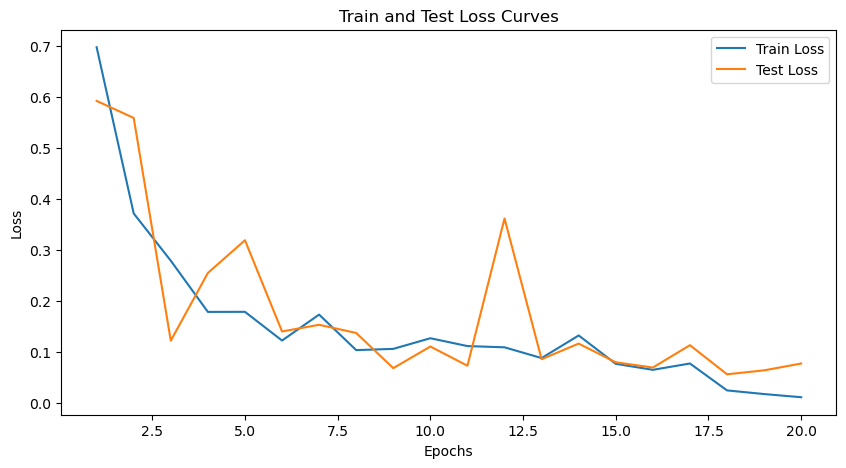

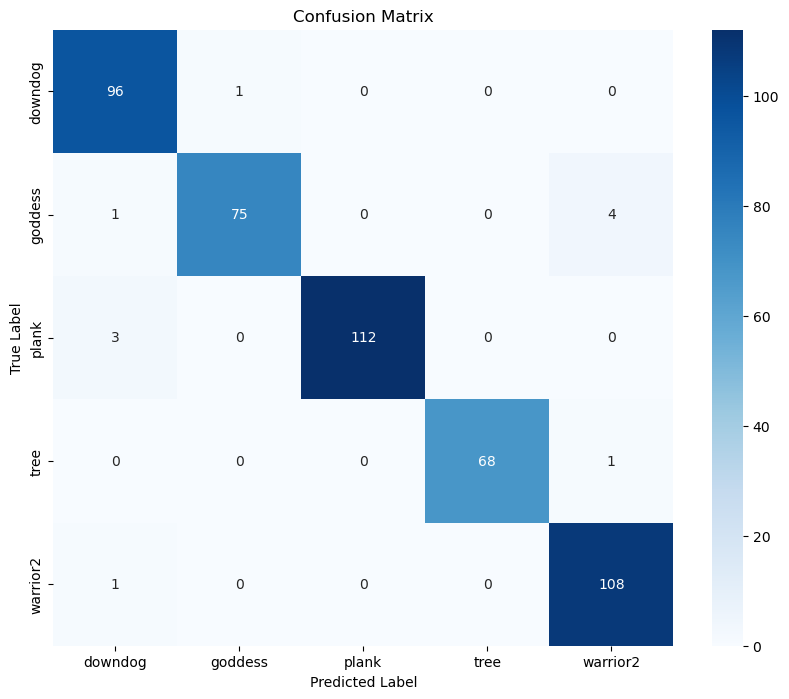

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names

# Setup dataloaders
# Setup directory paths to train and test images
train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)

# Define model (using Inception v3)
model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # use only the primary output
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Plotting confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
import torch

# Assuming `model` is your PyTorch model
torch.save(model.state_dict(), 'niharika_inception.pth')

F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.6468, Test Loss: 0.4055, Test Accuracy: 0.8340, Precision: 0.8619, Recall: 0.8340, F1 Score: 0.8190
Epoch [2/20], Train Loss: 0.3196, Test Loss: 0.2726, Test Accuracy: 0.9149, Precision: 0.9228, Recall: 0.9149, F1 Score: 0.9157
Epoch [3/20], Train Loss: 0.2460, Test Loss: 0.1980, Test Accuracy: 0.9255, Precision: 0.9321, Recall: 0.9255, F1 Score: 0.9249
Epoch [4/20], Train Loss: 0.2182, Test Loss: 0.3873, Test Accuracy: 0.8681, Precision: 0.8971, Recall: 0.8681, F1 Score: 0.8676
Epoch [5/20], Train Loss: 0.1686, Test Loss: 0.1967, Test Accuracy: 0.9383, Precision: 0.9432, Recall: 0.9383, F1 Score: 0.9386
Epoch [6/20], Train Loss: 0.1609, Test Loss: 0.1200, Test Accuracy: 0.9596, Precision: 0.9596, Recall: 0.9596, F1 Score: 0.9594
Epoch [7/20], Train Loss: 0.1199, Test Loss: 0.0793, Test Accuracy: 0.9681, Precision: 0.9689, Recall: 0.9681, F1 Score: 0.9679
Epoch [8/20], Train Loss: 0.0919, Test Loss: 0.0351, Test Accuracy: 0.9851, Precision: 0.9857, Recall: 0

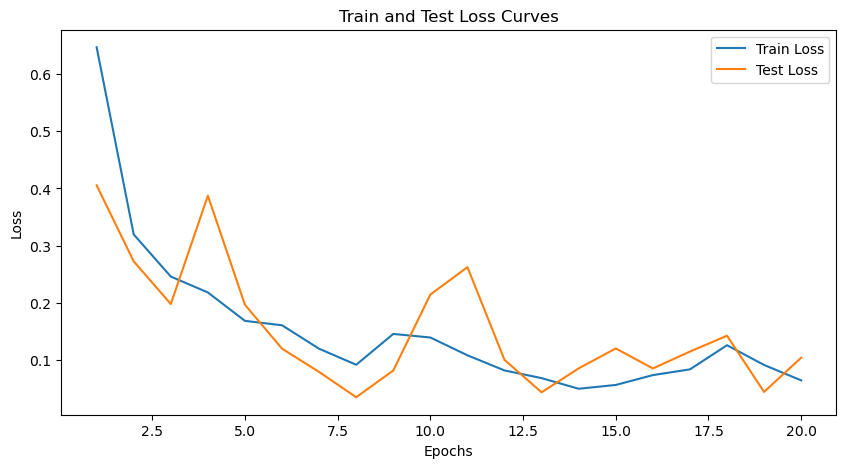

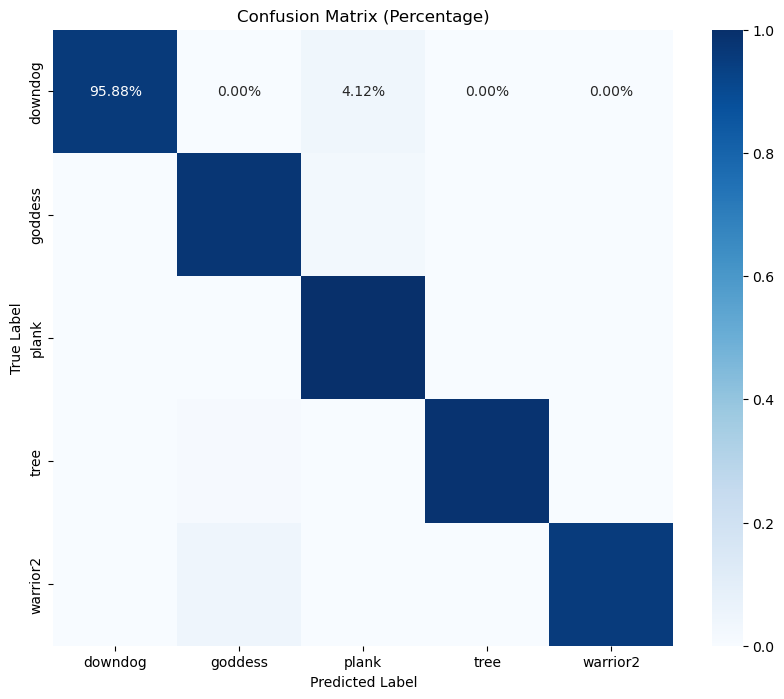

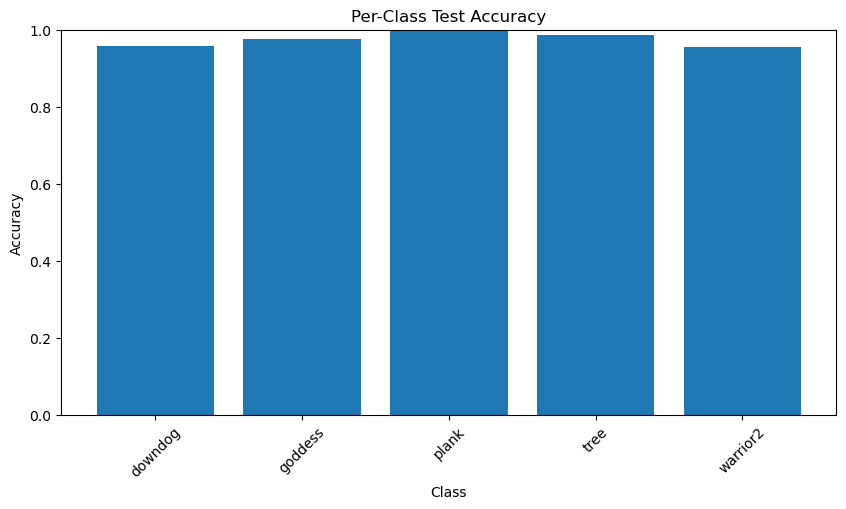

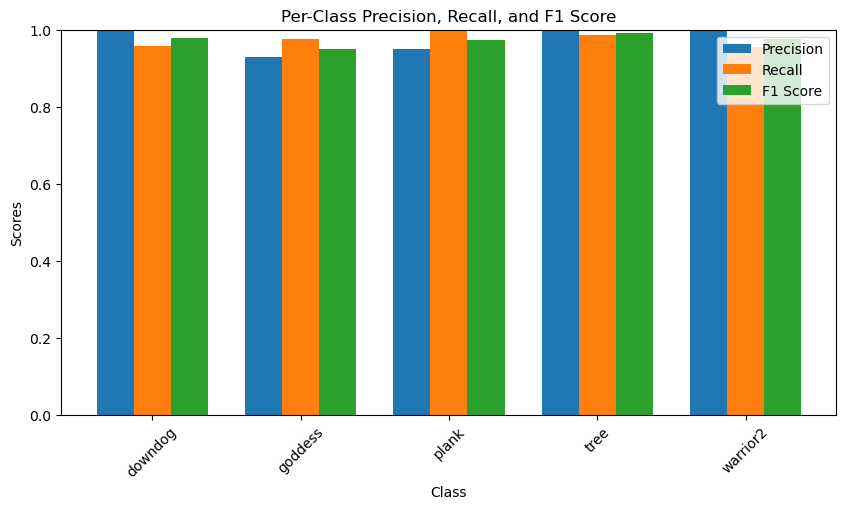

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names

# Setup dataloaders
train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)

# Define model (using Inception v3)
model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    per_class_correct = np.zeros(len(class_names))
    per_class_total = np.zeros(len(class_names))

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # use only the primary output
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    per_class_correct[label] += 1
                per_class_total[label] += 1

    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Plotting confusion matrix in terms of percentage
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Plotting per-class accuracy bar graph
per_class_accuracy = per_class_correct / per_class_total
plt.figure(figsize=(10, 5))
plt.bar(class_names, per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Test Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Get per-class precision, recall, and f1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

# Extract per-class precision, recall, and f1-score
per_class_precision = [report[class_name]['precision'] for class_name in class_names]
per_class_recall = [report[class_name]['recall'] for class_name in class_names]
per_class_f1 = [report[class_name]['f1-score'] for class_name in class_names]

# Plotting per-class precision, recall, and f1-score
plt.figure(figsize=(10, 5))
x = np.arange(len(class_names))
width = 0.25

plt.bar(x - width, per_class_precision, width=width, label='Precision')
plt.bar(x, per_class_recall, width=width, label='Recall')
plt.bar(x + width, per_class_f1, width=width, label='F1 Score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Per-Class Precision, Recall, and F1 Score')
plt.xticks(x, class_names, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.show()


F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 0.6728826550876393, Test Loss: 0.2264366151144107, Test Accuracy: 0.9297872340425531, Precision: 0.9301749776508438, Recall: 0.9297872340425531, F1 Score: 0.9287142605160019
Epoch [2/20], Train Loss: 0.39430125671274524, Test Loss: 0.23528539179824293, Test Accuracy: 0.925531914893617, Precision: 0.928326259020788, Recall: 0.925531914893617, F1 Score: 0.9255591532187277
Epoch [3/20], Train Loss: 0.22889496320310762, Test Loss: 0.10827494412660599, Test Accuracy: 0.9595744680851064, Precision: 0.9608126312846569, Recall: 0.9595744680851064, F1 Score: 0.9595944274312989
Epoch [4/20], Train Loss: 0.21993507521555705, Test Loss: 0.5958554826463417, Test Accuracy: 0.8468085106382979, Precision: 0.8969551080118384, Recall: 0.8468085106382979, F1 Score: 0.8506464984792544
Epoch [5/20], Train Loss: 0.2029310535529957, Test Loss: 0.0970588680356741, Test Accuracy: 0.9659574468085106, Precision: 0.9666425575324525, Recall: 0.9659574468085106, F1 Score: 0.965924543856058

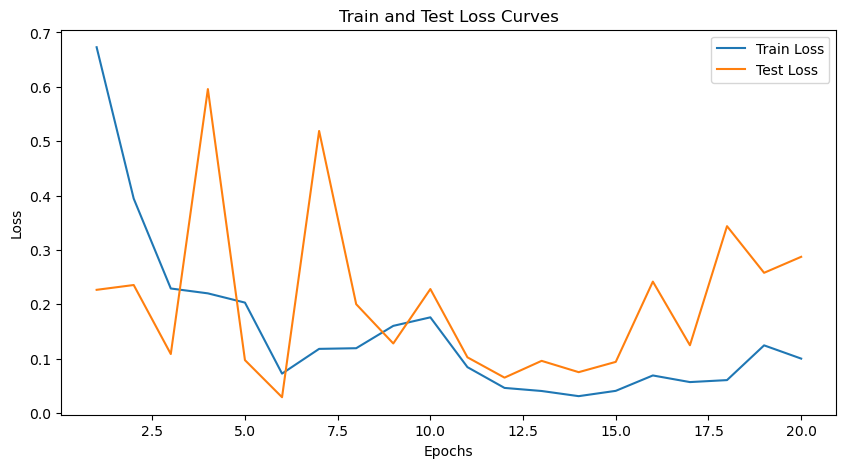

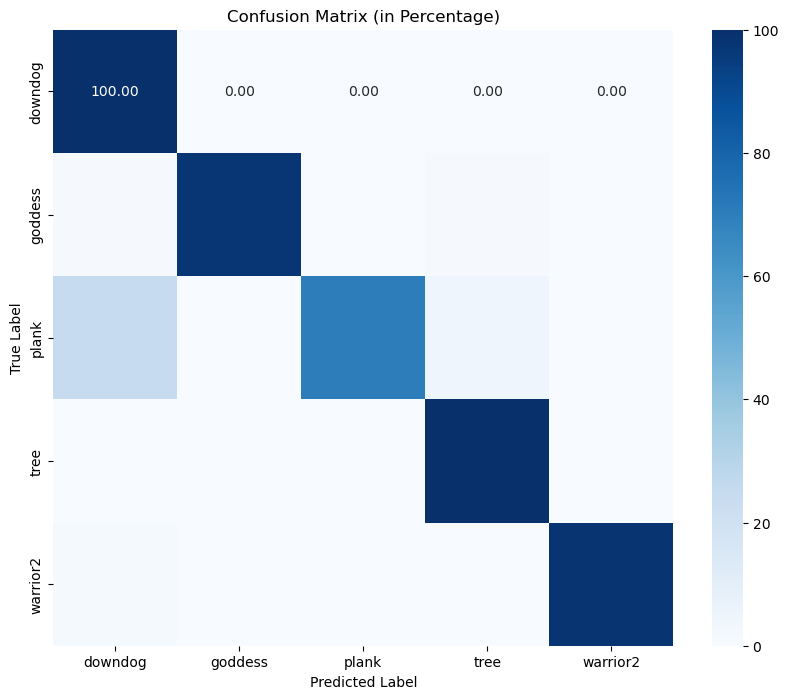

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names

# Setup dataloaders
train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'


train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)

# Define model (using Inception v3)
model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # use only the primary output
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Plotting confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in Percentage)')
plt.show()


Epoch [1/20], Train Loss: 0.5883242325747714, Test Loss: 0.15782896179783468, Test Accuracy: 0.951063829787234, Precision: 0.9524860128062353, Recall: 0.951063829787234, F1 Score: 0.9506458602507714
Epoch [2/20], Train Loss: 0.35399850589387555, Test Loss: 0.23668501457820337, Test Accuracy: 0.9106382978723404, Precision: 0.9313882978723405, Recall: 0.9106382978723404, F1 Score: 0.91070408382472
Epoch [3/20], Train Loss: 0.27664323512683897, Test Loss: 0.1716666524298489, Test Accuracy: 0.9553191489361702, Precision: 0.9586127786852209, Recall: 0.9553191489361702, F1 Score: 0.9548393161789837
Epoch [4/20], Train Loss: 0.1994263263528838, Test Loss: 0.1287651361276706, Test Accuracy: 0.9595744680851064, Precision: 0.9611498404055759, Recall: 0.9595744680851064, F1 Score: 0.9597067073186489
Epoch [5/20], Train Loss: 0.13142363003948154, Test Loss: 0.2973990231752396, Test Accuracy: 0.9106382978723404, Precision: 0.9196225174365102, Recall: 0.9106382978723404, F1 Score: 0.9114746136997032

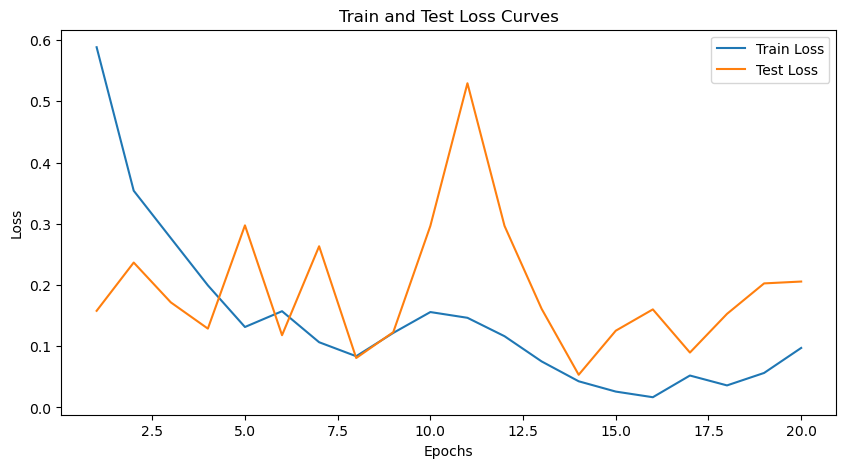

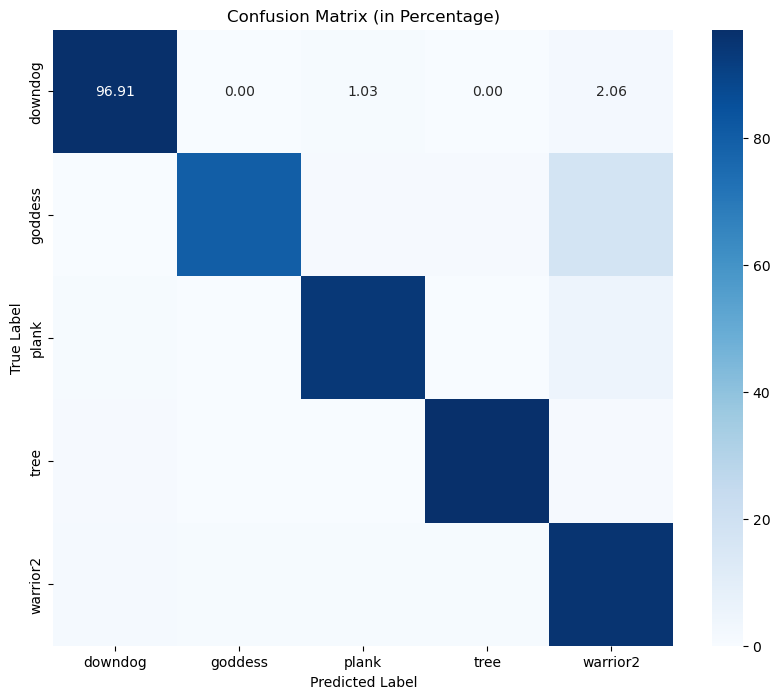

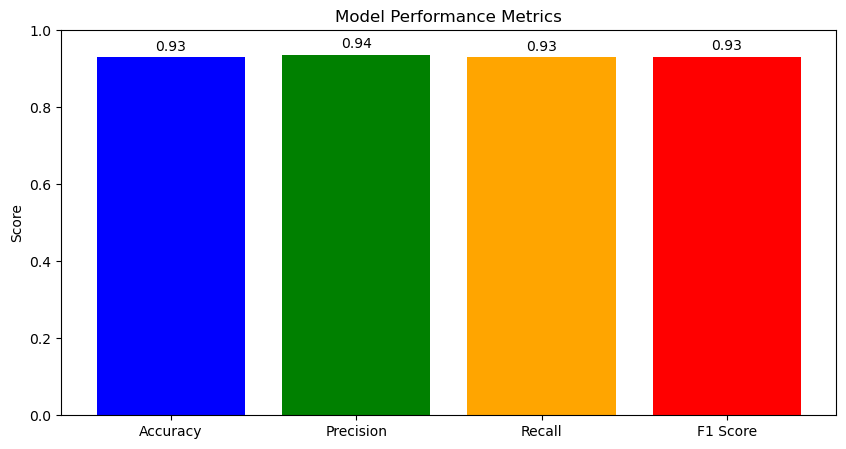

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names

# Setup dataloaders
train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)

# Define model (using Inception v3)
model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # use only the primary output
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Plotting confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in Percentage)')
plt.show()

# Plotting accuracy, precision, recall, and F1 score in a single bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracies[-1], precisions[-1], recalls[-1], f1_scores[-1]]

plt.figure(figsize=(10, 5))
plt.bar(metrics, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
plt.show()


In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define transformations
img_height, img_width = 299, 299
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir, test_dir, train_transform, test_transform, batch_size, num_workers=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    class_names = train_data.classes

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True
    )
    test_dataloader = DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True
    )

    return train_dataloader, test_dataloader, class_names

# Setup dataloaders
train_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TRAIN'
test_dir = r'F:\ML_Projects\Image_Classification\niharika\DATASET\TEST'

train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    train_transform=train_transforms,
    test_transform=test_transforms,
    batch_size=32
)

# Define model (using Inception v3)
model = models.inception_v3(pretrained=True, aux_logits=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if isinstance(outputs, tuple):
            outputs = outputs[0]  # use only the primary output
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            if isinstance(outputs, tuple):
                outputs = outputs[0]  # use only the primary output
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    test_losses.append(test_loss / len(test_dataloader))

    accuracy = correct / total
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}, Test Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Plotting train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.show()

# Compute metrics for each class
precision_per_class, recall_per_class, f1_per_class, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None, labels=range(len(class_names)))

# Plotting confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in Percentage)')
plt.show()

# Combine metrics into a single bar graph
x = np.arange(len(class_names))
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
bars1 = ax.bar(x - width*1.5, precision_per_class*100, width, label='Precision')
bars2 = ax.bar(x - width*0.5, recall_per_class*100, width, label='Recall')
bars3 = ax.bar(x + width*0.5, f1_per_class*100, width, label='F1 Score')
bars4 = ax.bar(x + width*1.5, [accuracy*100]*len(class_names), width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Test Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()

# Annotate bars with their values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)
annotate_bars(bars4)

plt.tight_layout()
plt.show()


F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

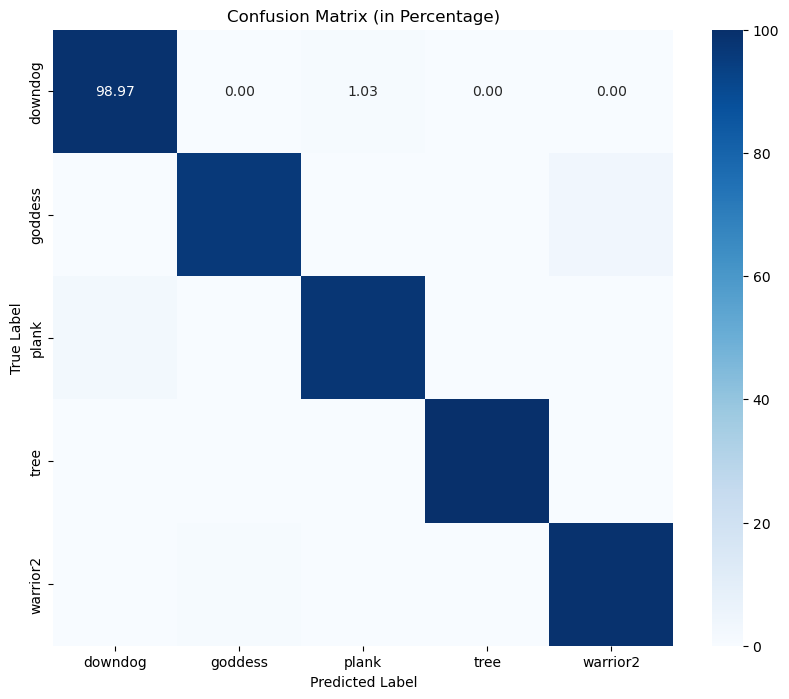

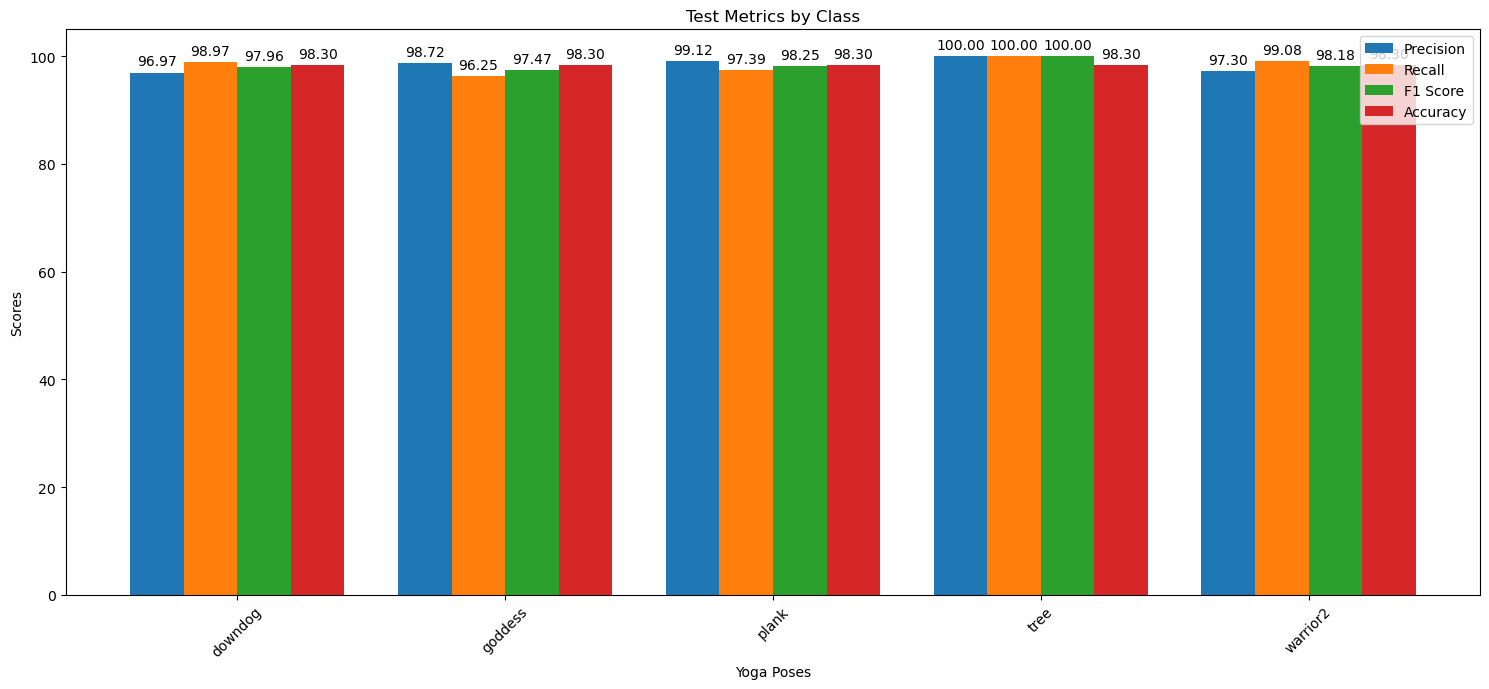

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in Percentage)')
plt.show()

# Combine metrics into a single bar graph
x = np.arange(len(class_names))
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
bars1 = ax.bar(x - width*1.5, precision_per_class*100, width, label='Precision')
bars2 = ax.bar(x - width*0.5, recall_per_class*100, width, label='Recall')
bars3 = ax.bar(x + width*0.5, f1_per_class*100, width, label='F1 Score')
bars4 = ax.bar(x + width*1.5, [accuracy*100]*len(class_names), width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Yoga Poses')
ax.set_ylabel('Scores')
ax.set_title('Test Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()

# Annotate bars with their values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)
annotate_bars(bars4)

plt.tight_layout()
plt.savefig('combined_metrics_bar_graph.png', dpi=300)
plt.show()
